In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
observations = 1000
xs = np.random.uniform(10,-10,(observations,1))
zs = np.random.uniform(10,-10,(observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs +5 +noise
#テンソルでデータを保存するためのコード
np.savez('TF_intro',inputs = generated_inputs, targets = generated_targets)

In [6]:
training_data = np.load('TF_intro.npz')

In [17]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    #線形モデル作成のコード,kernel~とbias~はモデルのカスタマイズ（重みとバイアスの初期値、通常は不要なので念のため学習したという程度)
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1,maxval = 0.1),
                         bias_initializer = tf.random_uniform_initializer(minval = -0.1,maxval=0.1))
])
#目的関数、最適化アルゴリズムの指定（確率的勾配効果法、ヘルツノルム損失:二乗誤差（平均でわって汎用性を高める。))
model.compile(optimizer='sgd',loss ='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs =100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 30.0143
Epoch 2/100
32/32 - 0s - loss: 4.5016
Epoch 3/100
32/32 - 0s - loss: 1.4966
Epoch 4/100
32/32 - 0s - loss: 0.6476
Epoch 5/100
32/32 - 0s - loss: 0.4250
Epoch 6/100
32/32 - 0s - loss: 0.3717
Epoch 7/100
32/32 - 0s - loss: 0.3458
Epoch 8/100
32/32 - 0s - loss: 0.3485
Epoch 9/100
32/32 - 0s - loss: 0.3448
Epoch 10/100
32/32 - 0s - loss: 0.3440
Epoch 11/100
32/32 - 0s - loss: 0.3395
Epoch 12/100
32/32 - 0s - loss: 0.3560
Epoch 13/100
32/32 - 0s - loss: 0.3404
Epoch 14/100
32/32 - 0s - loss: 0.3432
Epoch 15/100
32/32 - 0s - loss: 0.3449
Epoch 16/100
32/32 - 0s - loss: 0.3442
Epoch 17/100
32/32 - 0s - loss: 0.3390
Epoch 18/100
32/32 - 0s - loss: 0.3401
Epoch 19/100
32/32 - 0s - loss: 0.3419
Epoch 20/100
32/32 - 0s - loss: 0.3435
Epoch 21/100
32/32 - 0s - loss: 0.3438
Epoch 22/100
32/32 - 0s - loss: 0.3444
Epoch 23/100
32/32 - 0s - loss: 0.3367
Epoch 24/100
32/32 - 0s - loss: 0.3442
Epoch 25/100
32/32 - 0s - loss: 0.3352
Epoch 26/100
32/32 - 0s - loss: 0

In [10]:
model.layers[0].get_weights()

[array([[ 1.9893168],
        [-3.0184271]], dtype=float32),
 array([4.99547], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
biases

array([4.99547], dtype=float32)

In [13]:
#出力結果
model.predict_on_batch(training_data['inputs']).round(1)

array([[  1.2],
       [ 16. ],
       [  2.8],
       [ 22.8],
       [ -2.7],
       [-38.6],
       [ -3.2],
       [ 32. ],
       [ 43.4],
       [-20.9],
       [ 26. ],
       [ 13.5],
       [ -6.8],
       [ -2.2],
       [ -6.7],
       [ -3.9],
       [-20.6],
       [-15.1],
       [ 27.5],
       [ 11.7],
       [ 32.5],
       [ -1.8],
       [  2.5],
       [ -5.2],
       [ 44. ],
       [-17.2],
       [ -4.6],
       [ -6.4],
       [-29.6],
       [  0.3],
       [ 30.6],
       [-20.8],
       [ 28.8],
       [ 13.1],
       [ -5.1],
       [ 16.3],
       [-16.9],
       [-23.7],
       [-18.3],
       [  3.7],
       [ 15.8],
       [ 23.4],
       [ -7.8],
       [ 19.4],
       [  5.2],
       [  7.2],
       [-40.6],
       [ 45.3],
       [ 19.8],
       [-16.3],
       [ -5.5],
       [  1.7],
       [-13.2],
       [ 23.2],
       [ 19.5],
       [ 25.1],
       [ 26.8],
       [ -2.9],
       [ 21.5],
       [ -2.3],
       [ 14.3],
       [ 26.3],
       [

In [14]:
training_data['targets'].round(1)

array([[  1.8],
       [ 16.8],
       [  3.1],
       [ 23.4],
       [ -3.2],
       [-39. ],
       [ -2.8],
       [ 31.7],
       [ 42.9],
       [-19.8],
       [ 27. ],
       [ 12.9],
       [ -7.2],
       [ -1.9],
       [ -7.2],
       [ -3.5],
       [-20.1],
       [-14. ],
       [ 26.5],
       [ 12.5],
       [ 32.2],
       [ -0.9],
       [  3.5],
       [ -4. ],
       [ 43. ],
       [-17.1],
       [ -4.1],
       [ -6.6],
       [-29.1],
       [  0.6],
       [ 30.6],
       [-21.3],
       [ 29.1],
       [ 13.8],
       [ -5.2],
       [ 16.8],
       [-17.3],
       [-22.8],
       [-17.3],
       [  4.1],
       [ 15.5],
       [ 23.8],
       [ -7.5],
       [ 20.2],
       [  5.4],
       [  7.7],
       [-40.8],
       [ 45.9],
       [ 19.7],
       [-16.5],
       [ -6.3],
       [  1.1],
       [-13.9],
       [ 23.2],
       [ 18.7],
       [ 24.3],
       [ 26.1],
       [ -3. ],
       [ 20.9],
       [ -2.6],
       [ 15. ],
       [ 26.6],
       [

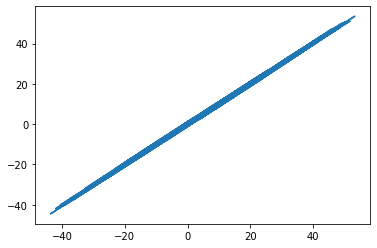

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))